In [1]:
import pandas as pd
from utils import make_plot, rmse  

In [2]:
# log_file_path = 'optim_wardi_test.log'
# log_file_path = 'regular_wardi_test.log'
log_file_path = 'loggg.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

time         x         y         z       yaw  throttle  roll_rate  \
0  7.152557e-07 -0.020292  0.014580  0.275920 -0.001793  0.738745        0.8   
1  2.598403e-01 -0.020292  0.014580  0.275920 -0.001793  0.769888        0.8   
2  2.701974e-01 -0.022356  0.012160  0.286376 -0.001718  0.791843        0.8   
3  2.798142e-01 -0.022550  0.012153  0.287044 -0.001697  0.807062        0.8   
4  2.897422e-01 -0.022751  0.012149  0.287733 -0.001685  0.817655        0.8   

   pitch_rate      yaw_rate  x_ref  y_ref  z_ref   yaw_ref  pred_time  \
0   -0.291350 -2.868443e-11    0.0    0.8   -0.8 -0.001793   0.189991   
1   -0.203865 -2.868443e-11    0.0    0.8   -0.8 -0.001793   0.000722   
2   -0.158810  1.619787e-11    0.0    0.8   -0.8 -0.001718   0.000306   
3   -0.123223  1.247266e-11    0.0    0.8   -0.8 -0.001697   0.000212   
4   -0.098474  1.025514e-11    0.0    0.8   -0.8 -0.001685   0.000203   

    nr_time  ctrl_callback_time             metadata  
0  0.189991            0.259527                  Sim  
1  0.000722            0.003812  flat wardi with jax  
2  0.000306            0.004453             1x Speed  
3  0.000212            0.003690         QuatYawError  
4  0.000203            0.003232                    0

In [3]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"Speed: {df_log['metadata'][2]}")
print(f"(Valid for Nonlin & Jax predictor only) Predictor was: {df_log['metadata'][3]}")
print(f"For yaw error we used: {df_log['metadata'][4]}")
print(f"{df_log['metadata'][5]}")
print(f"Mean NR computation time: {df_log['nr_time'].mean()}")
print(f"Mean NR computation freq: {1/df_log['nr_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: flat wardi with jax
Speed: 1x Speed
(Valid for Nonlin & Jax predictor only) Predictor was: QuatYawError
For yaw error we used: 0
0
Mean NR computation time: 0.0003069850484644146
Mean NR computation freq: 3257.487636619928
Mean callback time: 0.003747639034254703
RMSE: 0.43618322753127126


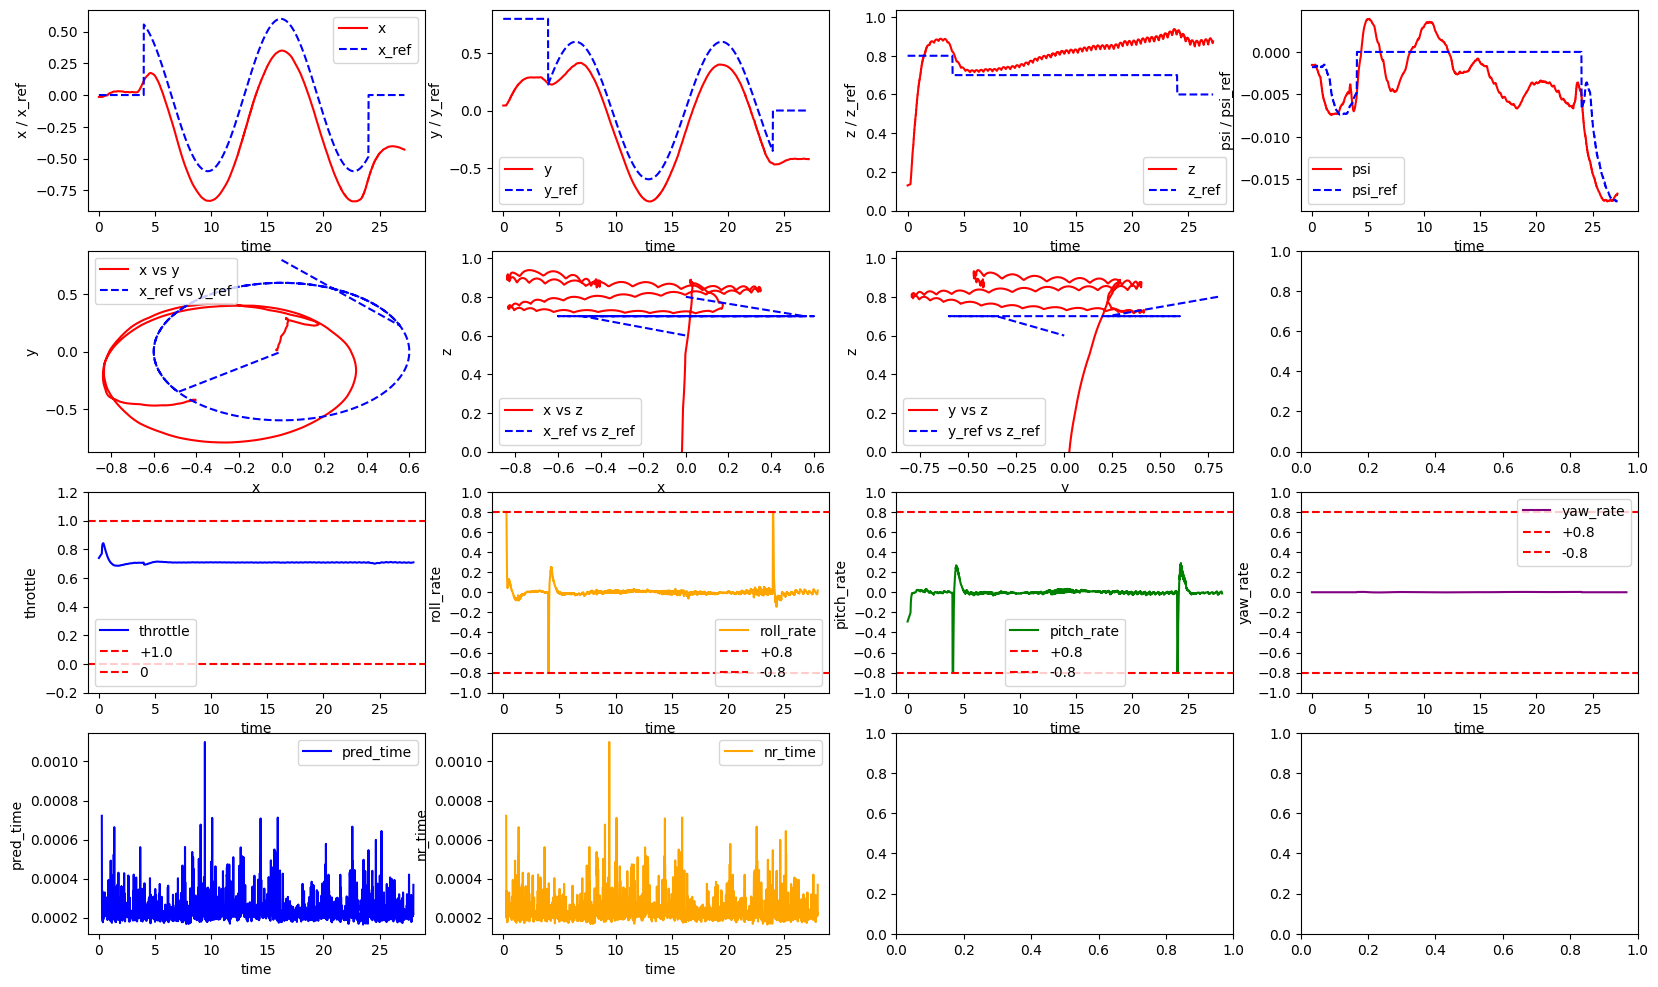

In [4]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)